In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from scipy import log,exp,sqrt,stats

In [20]:
# Importing pickle file: 
data = pd.read_pickle('/Users/louisribieras/Desktop/my_invictus/data/latest_coin_data.pkl')

In [21]:
data.head(5)

,"Jul 04, 2018","Jul 03, 2018","Jul 02, 2018","Jul 01, 2018","Jun 30, 2018","Jun 29, 2018","Jun 28, 2018","Jun 27, 2018","Jun 26, 2018","Jun 25, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
007coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'open_price': 0.001377, 'high_price': 0.00138...","{'open_price': 0.001441, 'high_price': 0.00144...","{'open_price': 0.001474, 'high_price': 0.00147...","{'open_price': 0.001477, 'high_price': 0.00148...","{'open_price': 0.00149, 'high_price': 0.001501..."
0chain,"{'open_price': 0.50634, 'high_price': 0.537679...","{'open_price': 0.480519, 'high_price': 0.57753...","{'open_price': 0.496757, 'high_price': 0.53016...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x,"{'open_price': 0.887873, 'high_price': 1.03, '...","{'open_price': 0.948858, 'high_price': 0.98870...","{'open_price': 0.79384, 'high_price': 0.989407...","{'open_price': 0.790663, 'high_price': 0.83599...","{'open_price': 0.65948, 'high_price': 0.834762...","{'open_price': 0.606791, 'high_price': 0.67642...","{'open_price': 0.642657, 'high_price': 0.66113...","{'open_price': 0.620553, 'high_price': 0.64416...","{'open_price': 0.708526, 'high_price': 0.70876...","{'open_price': 0.679638, 'high_price': 0.70613...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xbtc,"{'open_price': 1.13, 'high_price': 1.27, 'low_...","{'open_price': 1.11, 'high_price': 1.35, 'low_...","{'open_price': 0.904018, 'high_price': 1.14, '...","{'open_price': 0.868081, 'high_price': 0.95885...","{'open_price': 0.87697, 'high_price': 1.03, 'l...","{'open_price': 0.972314, 'high_price': 0.99065...","{'open_price': 0.989203, 'high_price': 1.08, '...","{'open_price': 1.11, 'high_price': 1.15, 'low_...","{'open_price': 1.2, 'high_price': 1.31, 'low_p...","{'open_price': 1.15, 'high_price': 1.25, 'low_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10mtoken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Selecting just adcoin row
adcoin_data = data.loc["adcoin"]
print(len(adcoin_data))
# Dropping null values
adc_data = adcoin_data.dropna()
print(len(adc_data))

916
314


In [23]:
adc = pd.DataFrame.from_dict(adc_data)
adc.head(5)

,adcoin
"Jul 04, 2018","{'open_price': 0.044853, 'high_price': 0.04692..."
"Jul 03, 2018","{'open_price': 0.046283, 'high_price': 0.04803..."
"Jul 02, 2018","{'open_price': 0.045283, 'high_price': 0.04745..."
"Jul 01, 2018","{'open_price': 0.045614, 'high_price': 0.05106..."
"Jun 30, 2018","{'open_price': 0.044804, 'high_price': 0.04667..."


In [24]:
# Make Series
adc = adc["adcoin"].apply(pd.Series)

In [25]:
adc.head(5)

,open_price,high_price,low_price,close_price,volume,market_cap
"Jul 04, 2018",0.044853,0.046929,0.041833,0.041856,1666.0,293384.0
"Jul 03, 2018",0.046283,0.048036,0.044870,0.044870,1247.0,302425.0
"Jul 02, 2018",0.045283,0.047454,0.044835,0.046501,1212.0,295566.0
"Jul 01, 2018",0.045614,0.051065,0.044750,0.045277,2080.0,297416.0
"Jun 30, 2018",0.044804,0.046679,0.044275,0.045603,1041.0,291800.0


In [26]:
# Compute the logarithmic returns using the Closing price
adc['Log_Ret'] = np.log(adc['close_price'] / adc['close_price'].shift(-1))
adc.head(5)

,open_price,high_price,low_price,close_price,volume,market_cap,Log_Ret
"Jul 04, 2018",0.044853,0.046929,0.041833,0.041856,1666.0,293384.0,-0.069534
"Jul 03, 2018",0.046283,0.048036,0.044870,0.044870,1247.0,302425.0,-0.035704
"Jul 02, 2018",0.045283,0.047454,0.044835,0.046501,1212.0,295566.0,0.026675
"Jul 01, 2018",0.045614,0.051065,0.044750,0.045277,2080.0,297416.0,-0.007174
"Jun 30, 2018",0.044804,0.046679,0.044275,0.045603,1041.0,291800.0,0.019016


In [14]:
# Computing returns using closing and opening prices
op = adc['open_price']
cl = adc['close_price']
profits = (cl - op)
# New column with results
adc['profits'] = profits
adc.head(5)

,open_price,high_price,low_price,close_price,volume,market_cap,Log_Ret,profits
"Jul 04, 2018",0.044853,0.046929,0.041833,0.041856,1666.0,293384.0,-0.069534,-0.002997
"Jul 03, 2018",0.046283,0.048036,0.044870,0.044870,1247.0,302425.0,-0.035704,-0.001413
"Jul 02, 2018",0.045283,0.047454,0.044835,0.046501,1212.0,295566.0,0.026675,0.001218
"Jul 01, 2018",0.045614,0.051065,0.044750,0.045277,2080.0,297416.0,-0.007174,-0.000337
"Jun 30, 2018",0.044804,0.046679,0.044275,0.045603,1041.0,291800.0,0.019016,0.000799


In [15]:
# Compute average price per day
h = adc['high_price']
l = adc['low_price']
avg_price = (h+l)/2
# New column with results
adc['avg_price'] = avg_price
adc.head(5)

,open_price,high_price,low_price,close_price,volume,market_cap,Log_Ret,profits,avg_price
"Jul 04, 2018",0.044853,0.046929,0.041833,0.041856,1666.0,293384.0,-0.069534,-0.002997,0.044381
"Jul 03, 2018",0.046283,0.048036,0.044870,0.044870,1247.0,302425.0,-0.035704,-0.001413,0.046453
"Jul 02, 2018",0.045283,0.047454,0.044835,0.046501,1212.0,295566.0,0.026675,0.001218,0.046145
"Jul 01, 2018",0.045614,0.051065,0.044750,0.045277,2080.0,297416.0,-0.007174,-0.000337,0.047907
"Jun 30, 2018",0.044804,0.046679,0.044275,0.045603,1041.0,291800.0,0.019016,0.000799,0.045477


In [16]:
# Calculating Volatility per day (difference btw close_price and avg_price)
c = adc['close_price']
avg = adc['avg_price']
volatility = (c - avg)
# New column with results
adc['volatility'] = volatility
adc.head(5)

,open_price,high_price,low_price,close_price,volume,market_cap,Log_Ret,profits,avg_price,volatility
"Jul 04, 2018",0.044853,0.046929,0.041833,0.041856,1666.0,293384.0,-0.069534,-0.002997,0.044381,-0.002525
"Jul 03, 2018",0.046283,0.048036,0.044870,0.044870,1247.0,302425.0,-0.035704,-0.001413,0.046453,-0.001583
"Jul 02, 2018",0.045283,0.047454,0.044835,0.046501,1212.0,295566.0,0.026675,0.001218,0.046145,0.000356
"Jul 01, 2018",0.045614,0.051065,0.044750,0.045277,2080.0,297416.0,-0.007174,-0.000337,0.047907,-0.002631
"Jun 30, 2018",0.044804,0.046679,0.044275,0.045603,1041.0,291800.0,0.019016,0.000799,0.045477,0.000126


In [17]:
#plotting 90 most recent daily average prices of adcoin
%matplotlib inline
#taking just the most recent 90
adc90 = adc.head(90)
#reordering dates
adcR90 = adc90.iloc[::-1]

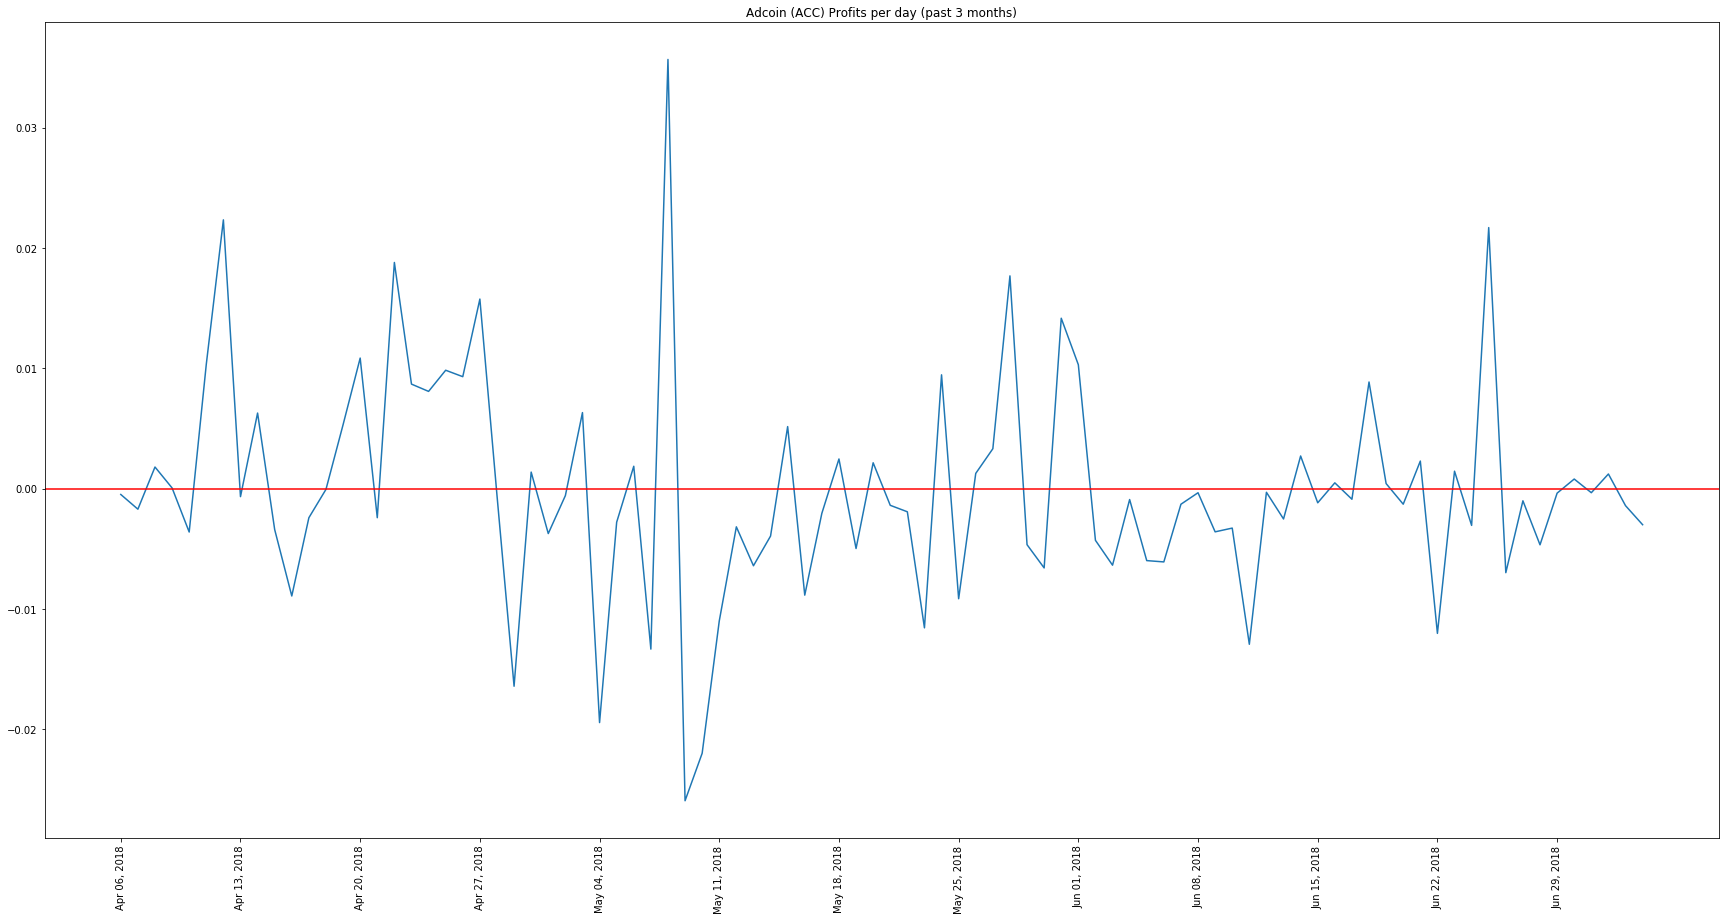

In [19]:
#plotting Profits (3 months)
x_value = adcR90.index
y_value = adcR90["profits"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,90,step=7), rotation=90)
plt.title('Adcoin (ACC) Profits per day (past 3 months)')
plt.axhline(0, color='red')
plt.show()

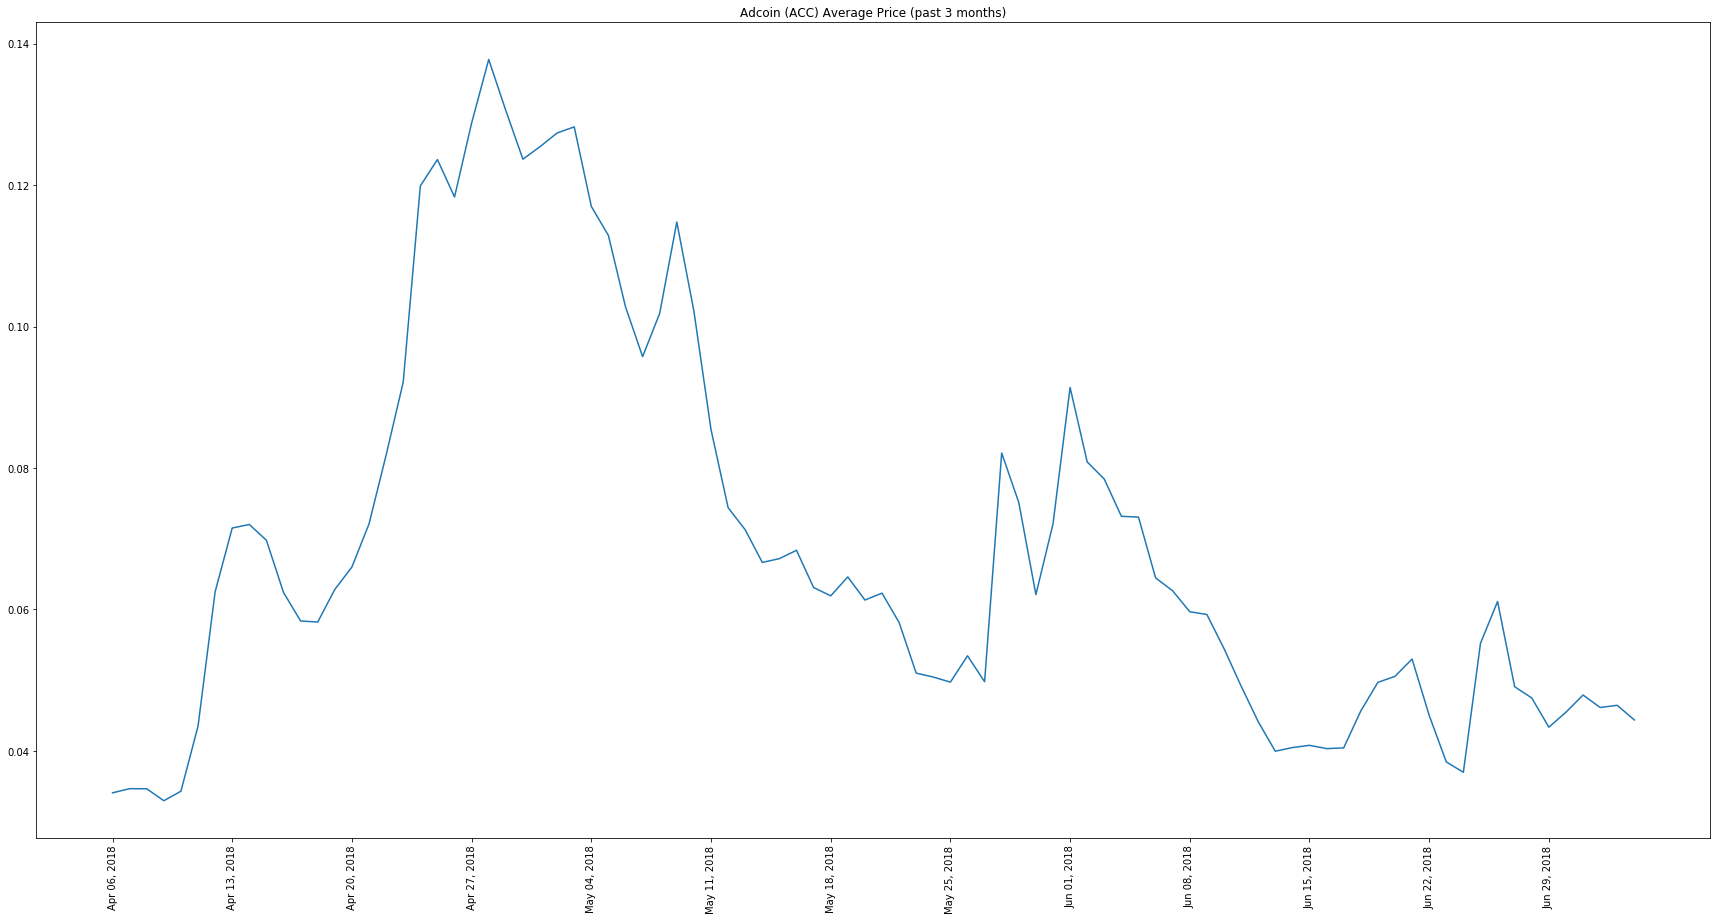

In [20]:
#plotting Average Price (3 months)
x_value = adcR90.index
y_value = adcR90["avg_price"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,90,step=7), rotation=90)
plt.title('Adcoin (ACC) Average Price (past 3 months)')
plt.show()

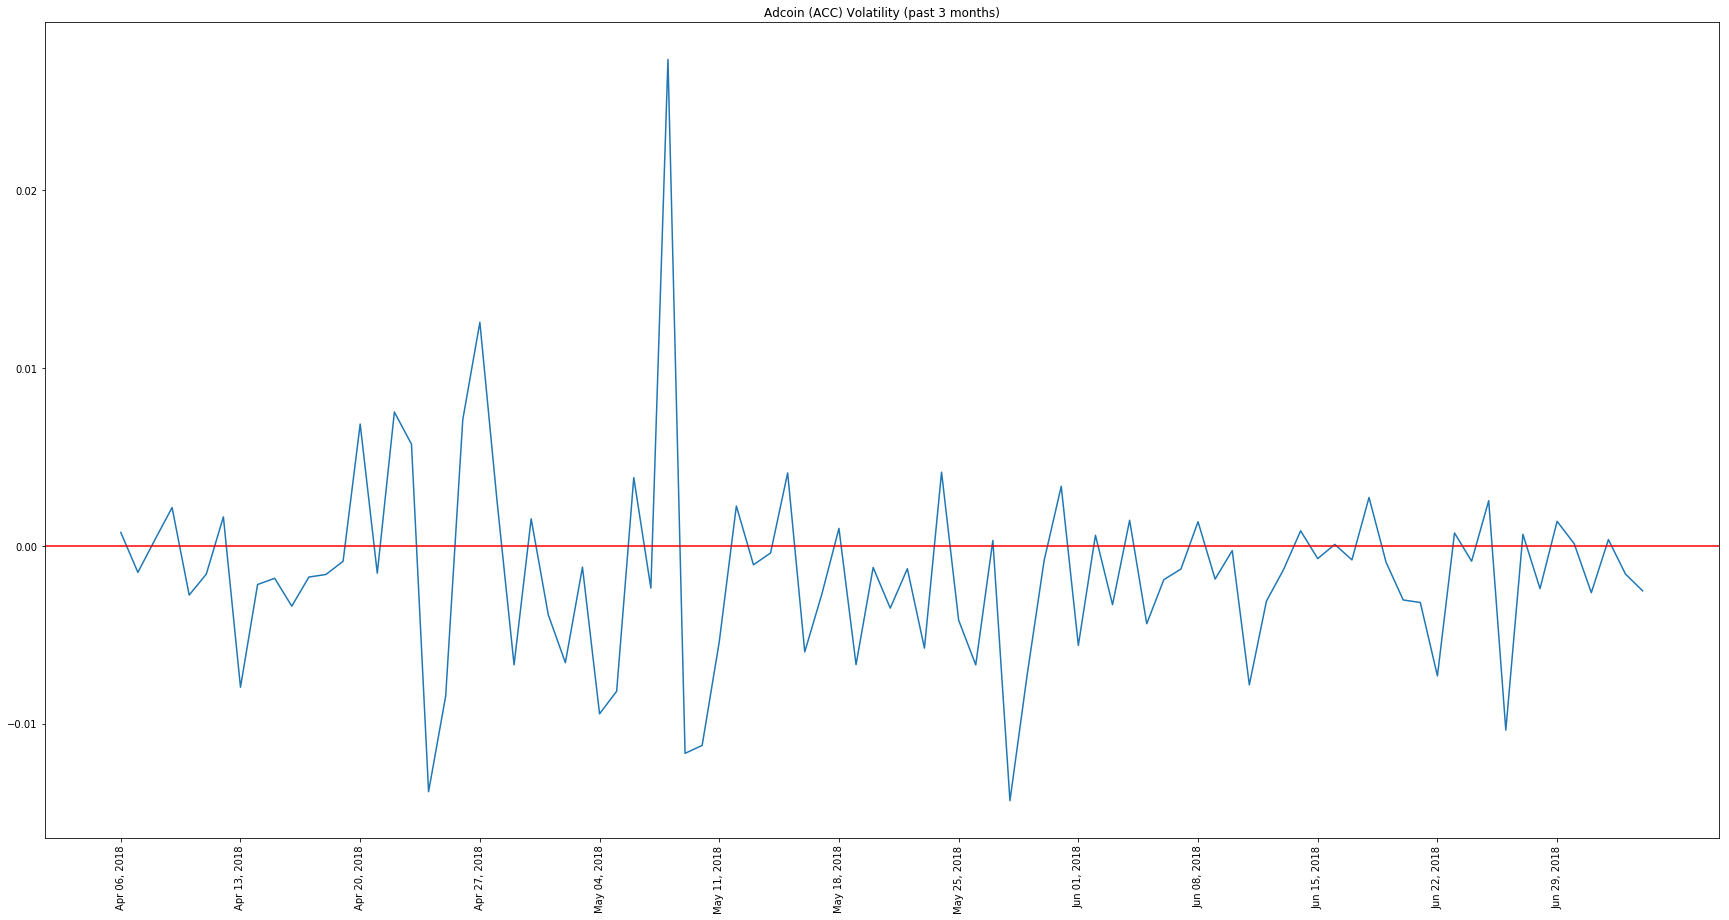

In [21]:
# Plotting Volatility (last 3 months)
x_value = adcR90.index
y_value = adcR90["volatility"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,90,step=7), rotation=90)
plt.title('Adcoin (ACC) Volatility (past 3 months)')
plt.axhline(0, color='red')
plt.show()

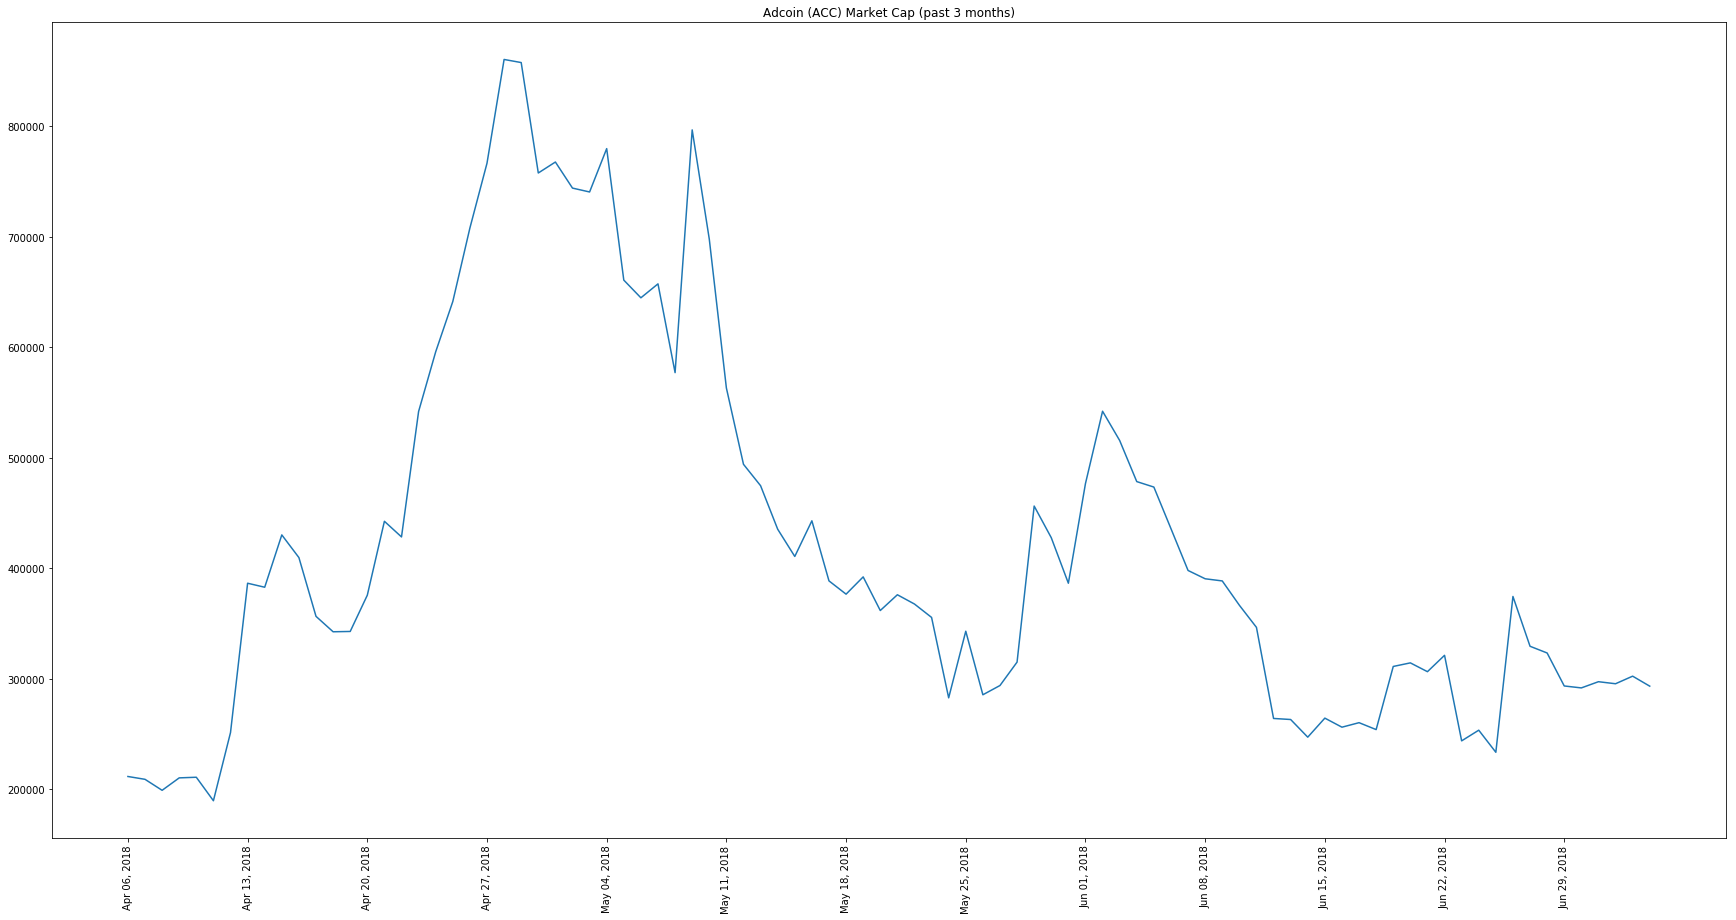

In [22]:
# Plottting Market Cap (3 months)
x_value = adcR90.index
y_value = adcR90["market_cap"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,90,step=7), rotation=90)
plt.title('Adcoin (ACC) Market Cap (past 3 months)')
plt.show()

In [23]:
# Reordering dates
adcR = adc.iloc[::-1]
adcR.tail(5)
print(len(adcR))

314


In [ ]:
#plotting Profits (Total)
x_value = adcR.index
y_value = adcR["profits"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,315,step=7), rotation=90)
plt.title('Adcoin (ACC) Profits per day')
plt.axhline(0, color='red')
plt.show()

In [ ]:
#plotting Average Price (Total)
x_value = adcR.index
y_value = adcR["avg_price"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,315,step=7), rotation=90)
plt.title('Adcoin (ACC) Average Price')
plt.show()

In [ ]:
# Plotting Volatility (Total)
x_value = adcR.index
y_value = adcR["volatility"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
plt.xticks(np.arange(0,315,step=7), rotation=90)
plt.title('Adcoin (ACC) Volatility')
plt.axhline(0, color='red')
plt.show()

In [ ]:
# Plottting Market Cap (Total)
x_value = adcR.index
y_value = adcR["market_cap"]
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(x_value, y_value)
# 141 is the fist market cap value (jan 13)
plt.xticks(np.arange(141,315,step=7), rotation=90)
plt.title('Adcoin (ACC) Market Cap')
plt.show()